# General

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(11)

# Gradient Descent with Momentum

## Update Rule

$v_{t}= \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta)$

$\theta = \theta - v_t$

## Example with $f(x) = x^2+10\sin(x)$

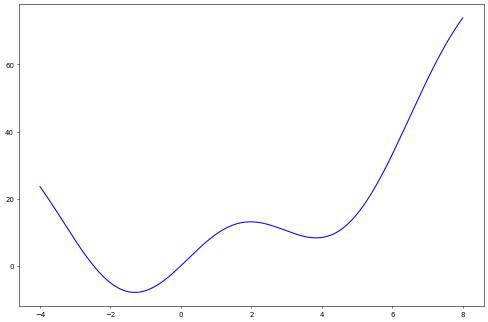

In [2]:
plt.figure(figsize=(12,8), dpi= 50, facecolor='w', edgecolor='k')

x0 = np.linspace(-4, 8, 500)
y0 = x0 ** 2 + 10 * np.sin(x0)

plt.plot(x0, y0, 'b')
plt.show()


In [3]:
def grad_u(x):
  return 2 * x + 10 * np.cos(x)

def cost_u(x):
  return x ** 2 + 10 * np.sin(x)

def has_converged(theta_new):
  return np.linalg.norm(grad_u(theta_new)) < 1e-3

In [4]:
def pure_GD(theta_init, eta):
  theta = [theta_init]
  it = 1

  while it < 500:
    theta_new = theta[-1] - eta * grad_u(theta[-1])
    if has_converged(theta_new):
      break
    theta.append(theta_new)
    it += 1

  return (theta, it)

def GD_momentum(theta_init, eta, gamma):
  theta = [theta_init]
  v_old = 0
  it = 1

  while it < 500:
    v_new = gamma * v_old + eta * grad_u(theta[-1])
    theta_new = theta[-1] - v_new
    if has_converged(theta_new):
      break
    theta.append(theta_new)
    v_old = v_new
    it += 1

  return (theta, it)


In [5]:
theta_init = 8
(theta1, it1) = pure_GD(theta_init, .1)
(theta2, it2) = GD_momentum(theta_init, 0.1, 0.9)
print(f'Solution found by pure GD: {theta1[-1]} after {it1} iterations.')
print(f'Solution found by GD with momentum: {theta2[-1]} after {it2} iterations.')

Solution found by pure GD: 3.8376300375955554 after 6 iterations.
Solution found by GD with momentum: -1.3058231077632456 after 175 iterations.


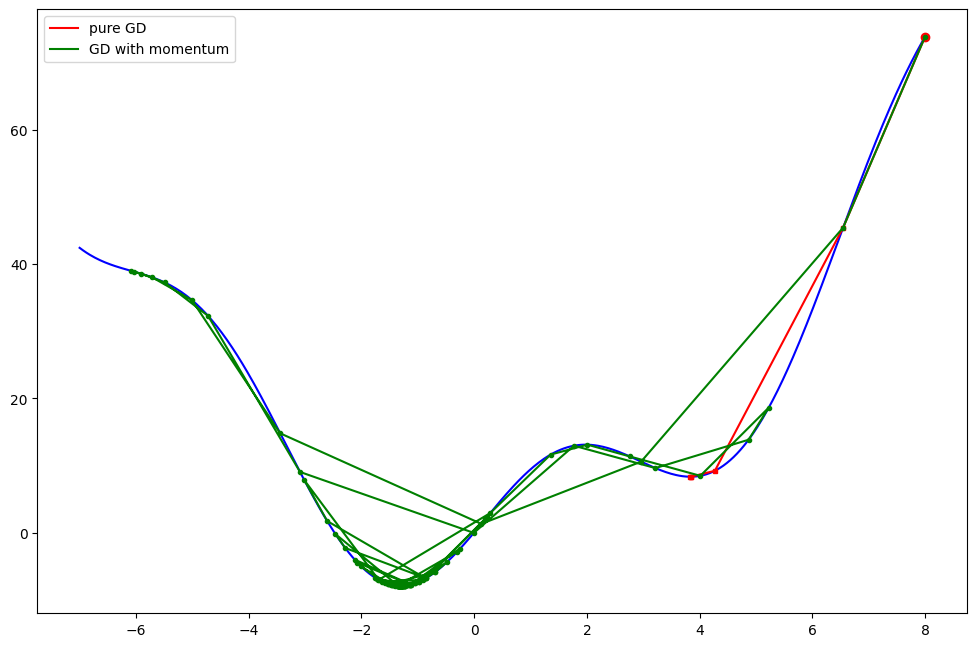

In [6]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

x0 = np.linspace(-7, 8, 500)
y0 = x0 ** 2 + 10 * np.sin(x0)

plt.plot(x0, y0, 'b')

local_y = cost_u(np.asarray(theta1))
global_y = cost_u(np.asarray(theta2))

plt.plot(8, cost_u(8), 'ro')

plt.plot(theta1, local_y, 'r', label = 'pure GD')
plt.plot(theta1, local_y, 'rs', markersize=3)

plt.plot(theta2, global_y, 'g', label = 'GD with momentum')
plt.plot(theta2, global_y, 'go', markersize=3)

plt.legend()
plt.show()

# Nesterov Accelerated Gradient (NAG)

## Update Rule

$v_{t}= \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta - \gamma v_{t-1})$

$\theta = \theta - v_t$

## Example with $f(x) = x^2+10\sin(x)$

In [7]:
def NAG(theta_init, eta, gamma):
  theta = [theta_init]
  v_old = 0
  it = 1

  while it < 500:
    v_new = gamma * v_old + eta * grad_u(theta[-1] - gamma * v_old)
    theta_new = theta[-1] - v_new
    if has_converged(theta_new):
      break
    
    theta.append(theta_new)
    v_old = v_new
    it += 1
  
  return (theta, it)

In [8]:
(theta3, it3) = NAG(theta_init, .1, .9)

print(f'Solution found by NAG: {theta3[-1]} after {it3} iterations.')


Solution found by NAG: -1.3065849233050513 after 15 iterations.


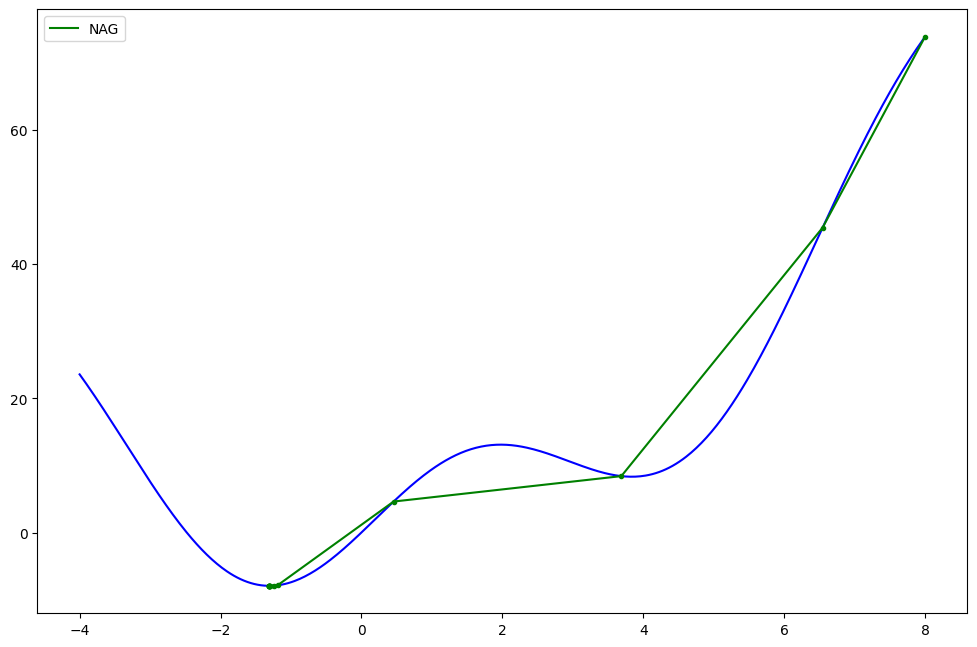

In [9]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

x0 = np.linspace(-4, 8, 500)
y0 = x0 ** 2 + 10 * np.sin(x0)

plt.plot(x0, y0, 'b')

nag_opt = cost_u(np.asarray(theta3))

plt.plot(theta3, nag_opt, 'g', label = 'NAG')
plt.plot(theta3, nag_opt, 'go', markersize=3)

plt.legend()
plt.show()

# Stochastic Gradient Descent (SGD)

## Update Rule

$\nabla_{\mathbf{w}}J(\mathbf{w}; \mathbf{x}_i; y_i) = \mathbf{x}_i^T(\mathbf{x}_i \mathbf{w} - y_i)$

$\theta = \theta - \eta \nabla_{\theta} J(\theta; \mathbf{x}_i; \mathbf{y}_i)$

## Example with Linear Regression

In [10]:
X = np.random.rand(1000, 1)
Y = 2 * X + 5 + 0.2 * np.random.randn(1000, 1)

X_bar = np.concatenate((np.ones_like(X), X), axis = 1)

N = 1000
n = 50

In [26]:
def sgrad(w, i, rd_id):
  true_id = rd_id[i]
  xi = X_bar[true_id]
  yi = Y[true_id]
  return (xi * (xi @ w - yi)).reshape(2, 1) # (1, 2) x ()

def SGD(w_init, eta):
  w = [w_init]
  w_check = w_init
  it = 1
  it_check = 20
  for t in range(1):
    rd_id = np.random.permutation(N)
    for i in range(N):
      w_new = w[-1] - eta * sgrad(w[-1], i, rd_id)
      w.append(w_new)
      if it % it_check == 0:
        if np.linalg.norm(w_new - w_check) < 1e-3:
          return w, it
        w_check = w_new
      it +=1 
    print(f'epoches {t + 1}')

  return w, it

In [27]:
w_init = np.array([[4, 1.5]]).T
(w, it) = SGD(w_init, 0.1)
print(it)

epoches 1
1001


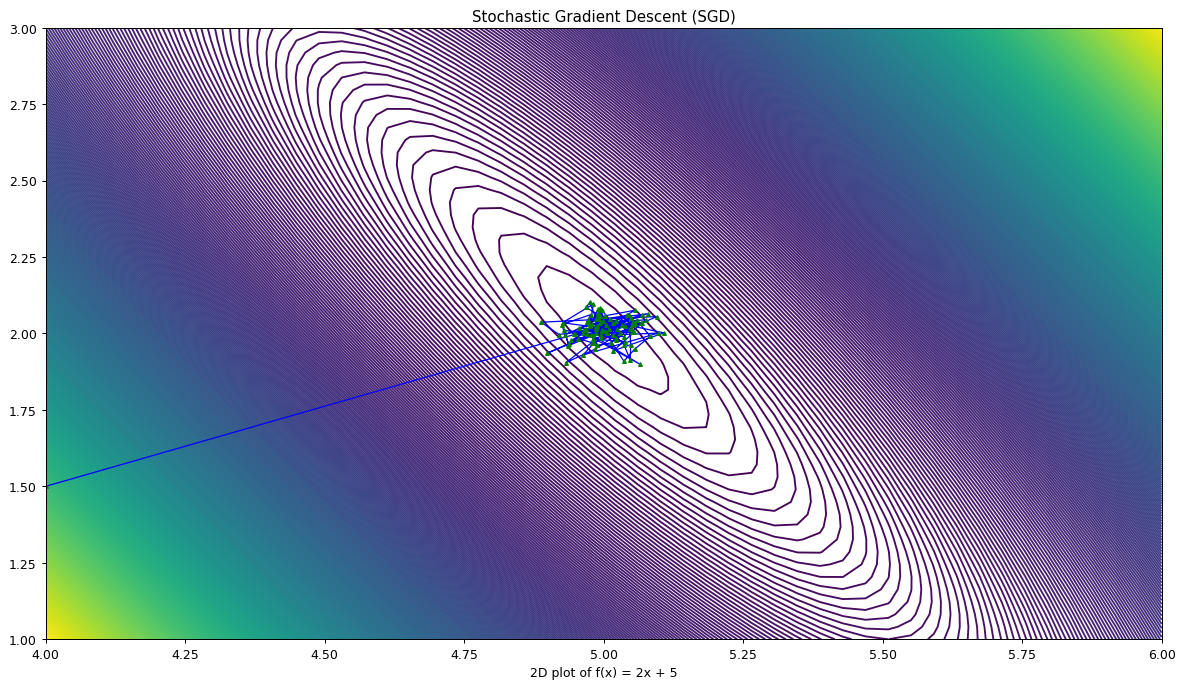

In [13]:
plt.figure(figsize=(16, 9), dpi= 90, facecolor='w', edgecolor='k')

def f(x,y):
  return np.array([[0.5 / N * np.linalg.norm(Y - X_bar @ np.array([[x[i, j]], [y[i, j]]])) ** 2 for j in range(n)] for i in range(n)])

x_ = np.linspace(4, 6, n)
y_ = np.linspace(1, 3, n)

x, y = np.meshgrid(x_, y_)

w_a = w_init.copy()

for i in range(1, it // 100):
  w_a = np.append(w_a, w[i * 100], axis = 1)

w_a = np.append(w_a, w[-1], axis = 1)

x_o = w_a[0]
y_o = w_a[1]

plt.plot(5, 2, 'ro', markersize=8)
plt.plot(x_o, y_o, 'b', linewidth = 1)
plt.plot(x_o, y_o, 'g^', markersize=3)
plt.xlabel('2D plot of f(x) = 2x + 5')

plt.contour(x, y, f(x, y), 500)

plt.title('Stochastic Gradient Descent (SGD)')

plt.show()

# Mini-batch Gradient Descent

## Update Rule

$\theta = \theta - \eta\nabla_{\theta} J(\theta; \mathbf{x}_{i:i+n}; \mathbf{y}_{i:i+n})$

## Example with Linear Regression

In [39]:
def mgrad(w, i, j, rd_id):
  Xt = X_bar[rd_id[i:j]]
  Yt = Y[rd_id[i:j]]
  # print(Xt.shape, w.shape, Yt.shape)
  return 1 / n * Xt.T @ (Xt @ w - Yt)

def mini_batch_GD(w_init, eta):
  w = [w_init]
  it = 1
  w_check = w_init
  it_check = 10
  for k in range(10):
    rd_id = np.random.permutation(N)
    for i in range(0, N // 50):
      w_new = w[-1] - eta * mgrad(w[-1], i * 50, i * 50 + 50, rd_id)
      w.append(w_new)
      if it % it_check == 0:
        if np.linalg.norm(w_new - w_check) < 5e-4:
          return w, it
        w_check = w_new
      
      it +=1 
    print(f'epoches {k + 1}')
  return w, it

In [37]:
(wm, itm) = mini_batch_GD(w_init, .1)

epoches 1
epoches 2
epoches 3
epoches 4
epoches 5
epoches 6
epoches 7
epoches 8
epoches 9
epoches 10


In [38]:
print(f'mini batch converges at w = {w[-1].T} after {itm} iterations')

mini batch converges at w = [[5.03384542 2.0020803 ]] after 201 iterations


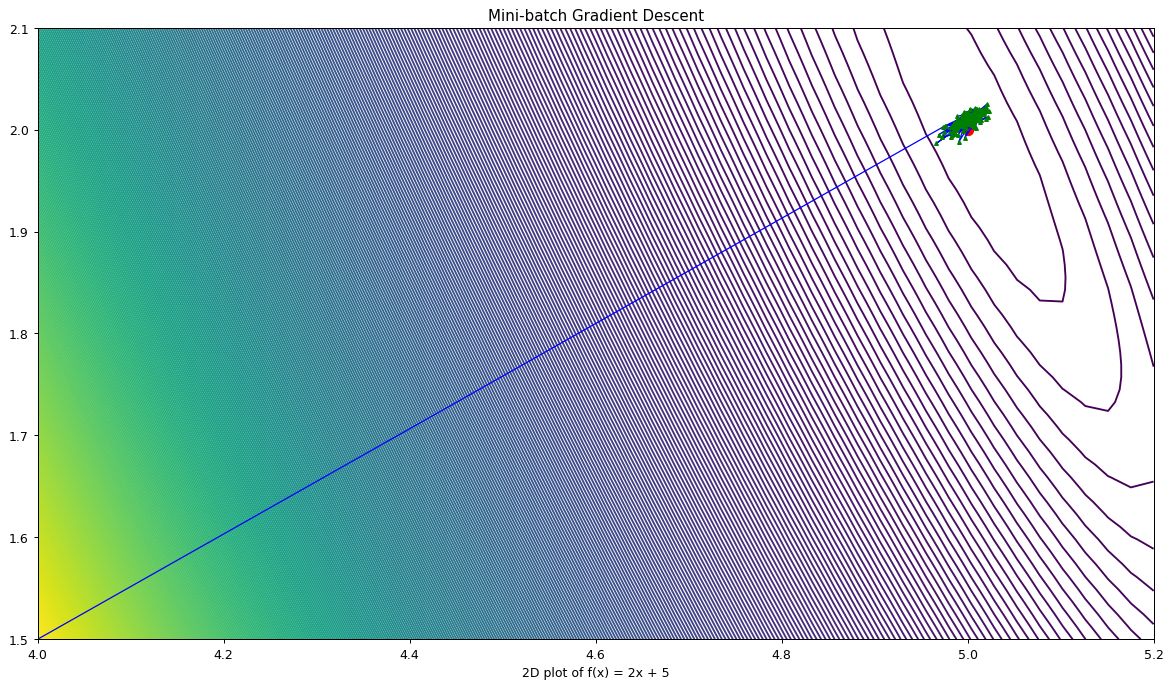

In [17]:
plt.figure(figsize=(16, 9), dpi= 90, facecolor='w', edgecolor='k')

def f(x,y):
  return np.array([[0.5 / N * np.linalg.norm(Y - X_bar @ np.array([[x[i, j]], [y[i, j]]])) ** 2 for j in range(n)] for i in range(n)])

x_ = np.linspace(4, 5.2, n)
y_ = np.linspace(1.5, 2.1, n)

x, y = np.meshgrid(x_, y_)

w_m = w_init.copy()

for i in range(1, itm // 10):
  w_m = np.append(w_m, wm[i * 10], axis = 1)

w_m = np.append(w_m, wm[-1], axis = 1)

x_o = w_m[0]
y_o = w_m[1]

plt.plot(5, 2, 'ro', markersize=8)
plt.plot(x_o, y_o, 'b', linewidth = 1)
plt.plot(x_o, y_o, 'g^', markersize=3)
plt.xlabel('2D plot of f(x) = 2x + 5')

plt.contour(x, y, f(x, y), 500)

plt.title('Mini-batch Gradient Descent')

plt.show()